In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# download library มาโดย sklearn ได้ทำ model มาให้ลอง ,numpy เป็นตัวช่วยคำนวณ math ,matplotlib เป็นตัว plot กราฟ ,pandas ช่วยวิเคราะห์ข้อมูล

##Load Iris data set from Scikitlearn and store in Pandas Dataframe format

In [2]:
iris_data = datasets.load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target
df.head()
# โหลดข้อมูลและให้ pandas list ออกมา 5 row แรก

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.columns
# พิมพ์ชื่อ column ทั้งหมดออกมา

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
df.describe()
# ให้ pandas วิเคราะห์ และแสดงข้อมูล

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

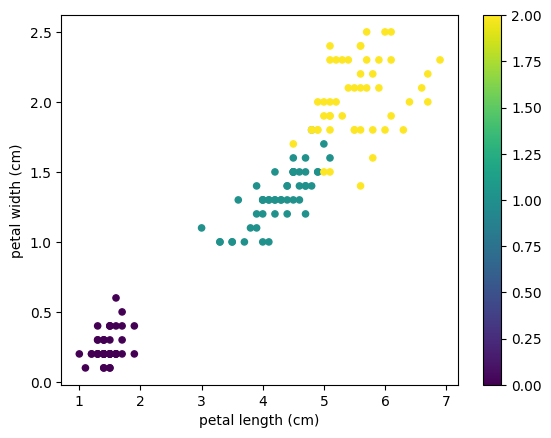

In [ ]:
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', c=df['target'], cmap=plt.cm.viridis)
# สั่งให้ plot กราฟโดยมีการกำหนดทั้งชนิด ข้อมูลที่ใช้เป็นแกน x และ y รวมไปถึงการกำหนดสีของข้อมูล

##Now we need to separate features and label, and divide the data set to 80% for training, and 20% for testing:

In [6]:
y = df['target'] #labels (0 = Setosa, 1 = Versicolour, 2 = Virginica)
X = df.drop(columns=['target','sepal length (cm)','sepal width (cm)']) #X = Features (2 out of 4)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, random_state=101)
# แยก feature และ label เพื่อ train+ทดสอบ โดยจะแบ่งจำนวนข้อเป็น 80/20 และมี random seed เป็น 101

In [7]:
X_train
# print ข้อมูล feature ที่ใช้สำหรับ train

,petal length (cm),petal width (cm)
104,5.8,2.2
89,4.0,1.3
116,5.5,1.8
82,3.9,1.2
112,5.5,2.1
...,...,...
63,4.7,1.4
70,4.8,1.8
81,3.7,1.0
11,1.6,0.2


# Create two different SVM classifiers (soft margin); one with Linear kernel, and another one with Polynomial kernel:

In [8]:
linear = svm.SVC(kernel='linear', C=0.1) # สร้าง model SVC ที่แบ่งด้วยฟังชั่นเส้นตรง และมี solf เท่ากับ 0.1
linear.fit(X_train, y_train)

poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(X_train, y_train)

SVC(C=1, kernel='poly')

#Evaluate the Accuracy of the two models

In [ ]:
print("Train set accuracy = " + str(linear.score(X_train, y_train)))
print("Test set accuracy = " + str(linear.score(X_test, y_test)))

Train set accuracy = 0.9416666666666667
Test set accuracy = 1.0


In [ ]:
print("Train set accuracy = " + str(poly.score(X_train, y_train)))
print("Test set accuracy = " + str(poly.score(X_test, y_test)))

Train set accuracy = 0.9583333333333334
Test set accuracy = 1.0


In [ ]:
poly_pred = poly.predict(X_test)
comparison_df = pd.DataFrame({'y_test': y_test, 'poly_pred': poly_pred, 'match': y_test == poly_pred})
print(comparison_df)

     y_test  poly_pred  match
33        0          0   True
16        0          0   True
43        0          0   True
129       2          2   True
50        1          1   True
123       2          2   True
68        1          1   True
53        1          1   True
146       2          2   True
1         0          0   True
147       2          2   True
32        0          0   True
31        0          0   True
122       2          2   True
127       2          2   True
74        1          1   True
88        1          1   True
96        1          1   True
42        0          0   True
134       2          2   True
80        1          1   True
48        0          0   True
90        1          1   True
65        1          1   True
97        1          1   True
64        1          1   True
93        1          1   True
114       2          2   True
25        0          0   True
41        0          0   True


#Plotting Decision Boundaries

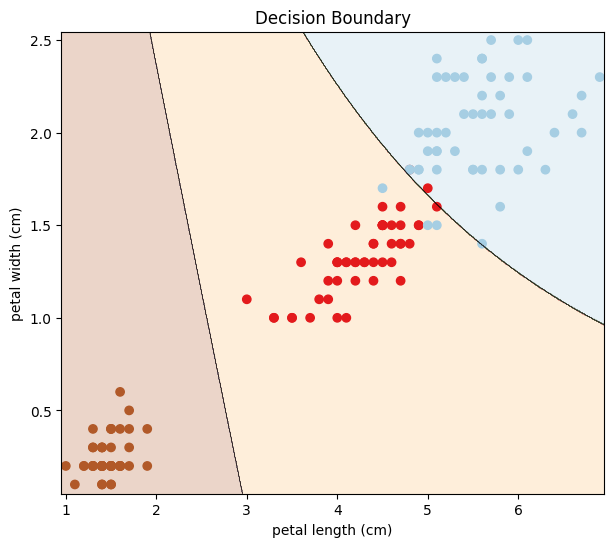

In [ ]:
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X['petal length (cm)'].min() - 10*h, X['petal length (cm)'].max() + 10*h
    y_min, y_max = X['petal width (cm)'].min() - 10*h, X['petal width (cm)'].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # use column names for prediction to avoid dimension issues
    Z = clf.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['petal length (cm)', 'petal width (cm)']))

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines

    # Plot the training data points
    plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, cmap=cmap)
    plt.xlabel(iris_data.feature_names[2])
    plt.ylabel(iris_data.feature_names[3])
    plt.title('Decision Boundary')
    plt.show()


# Call with the training data and polynomial model
plot_decision_boundary(poly, X, y)

# Apply other evaluation Matrics

In [ ]:
conf_matrix_polySVM = confusion_matrix(y_test, poly_pred)
precision_polySVM = precision_score(y_test, poly_pred, average="macro")
recall_polySVM = recall_score(y_test, poly_pred, average="macro")
f1_polySVM = f1_score(y_test, poly_pred, average="macro")

print("Polynomial SVM efficiency \n")
print("Precision: ", precision_polySVM)
print("Recall: ", recall_polySVM)
print("F1-Score: ", f1_polySVM)

print("Confusion Matrix:\n", conf_matrix_polySVM)


Polynomial SVM efficiency 

Precision:  1.0
Recall:  1.0
F1-Score:  1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [ ]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(linear, filename)

['finalized_model.sav']